In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import time
import random
random.seed(100)

In [32]:
# Importing the dataset
wine=pd.read_csv("WineQT.csv")

In [33]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [34]:
#Making binary classificaion for the response variable.
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    984
1    159
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

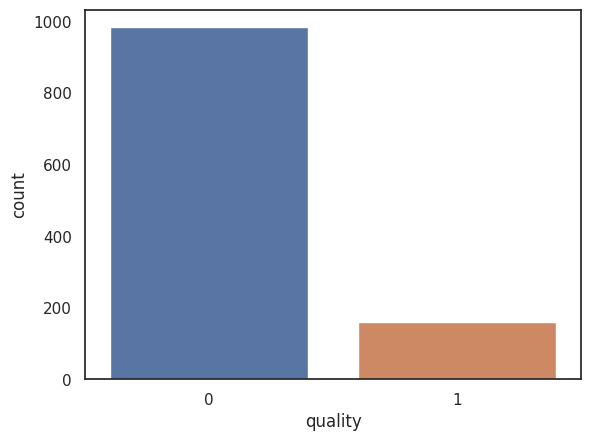

In [35]:
#plotting the response variable
sns.countplot(x=wine["quality"])

In [36]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [37]:
wine.shape

(1143, 13)

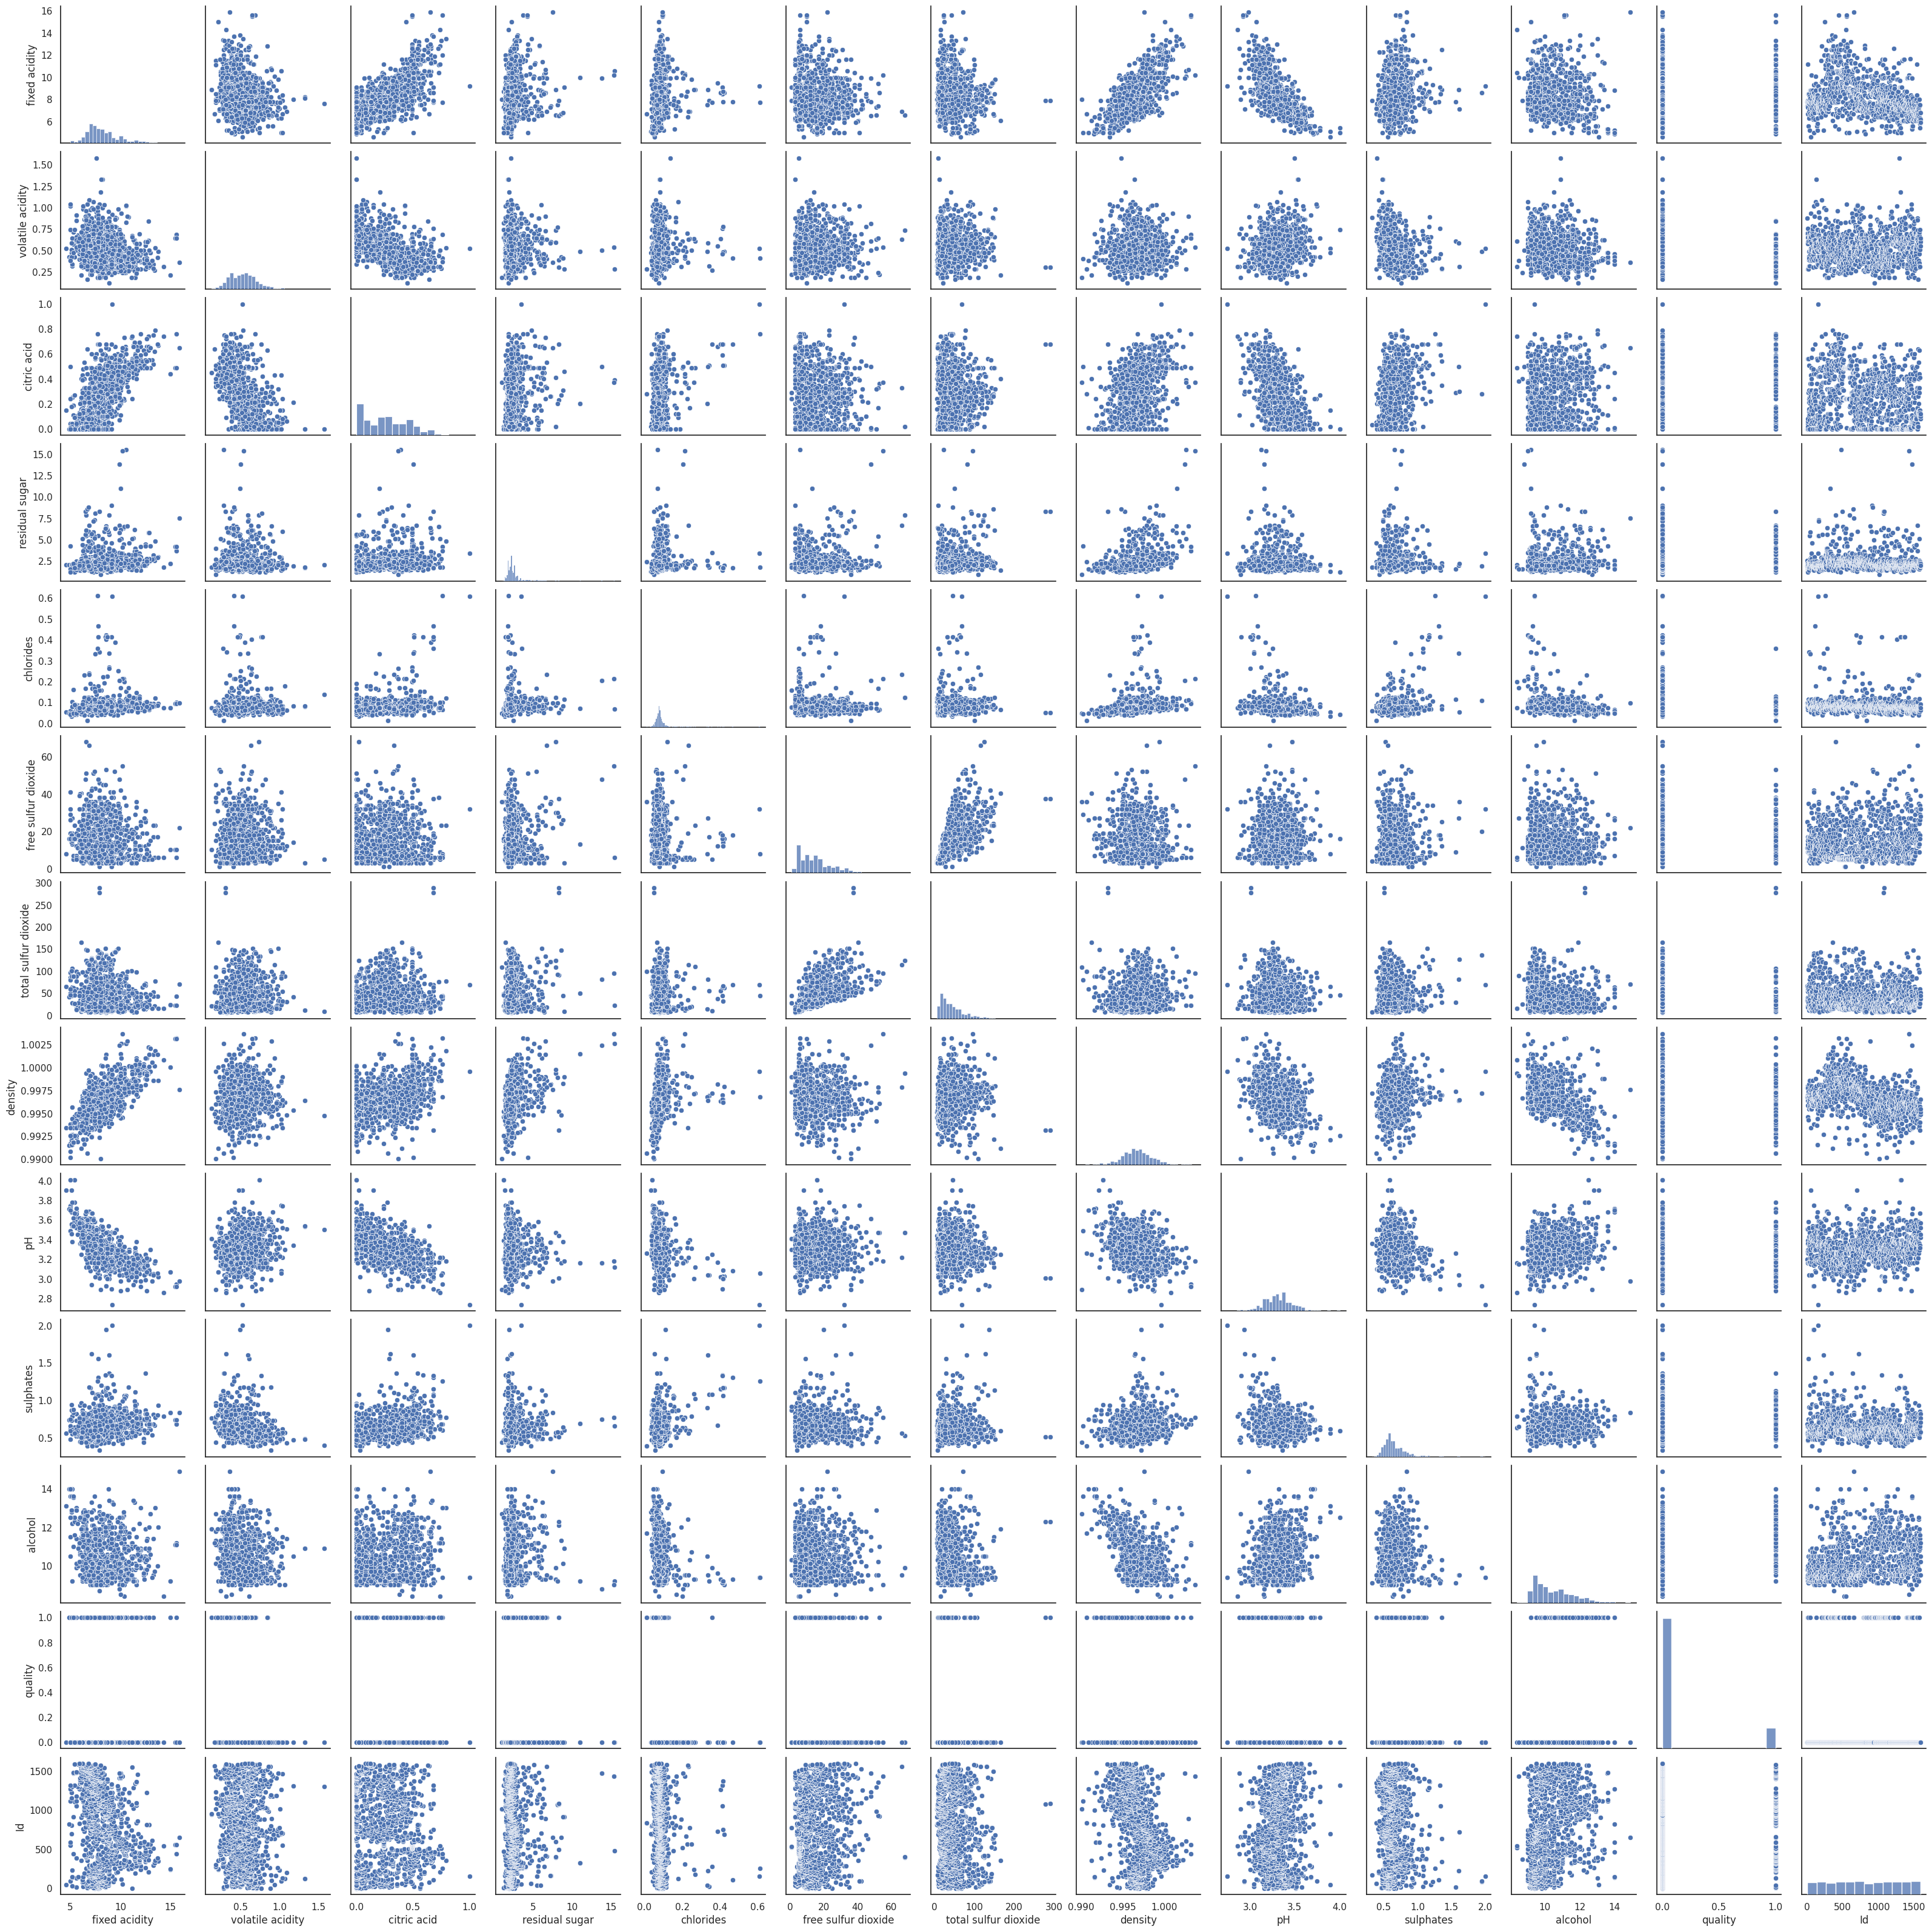

In [31]:
sns.pairplot(wine)

In [38]:
wine[wine.columns[:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


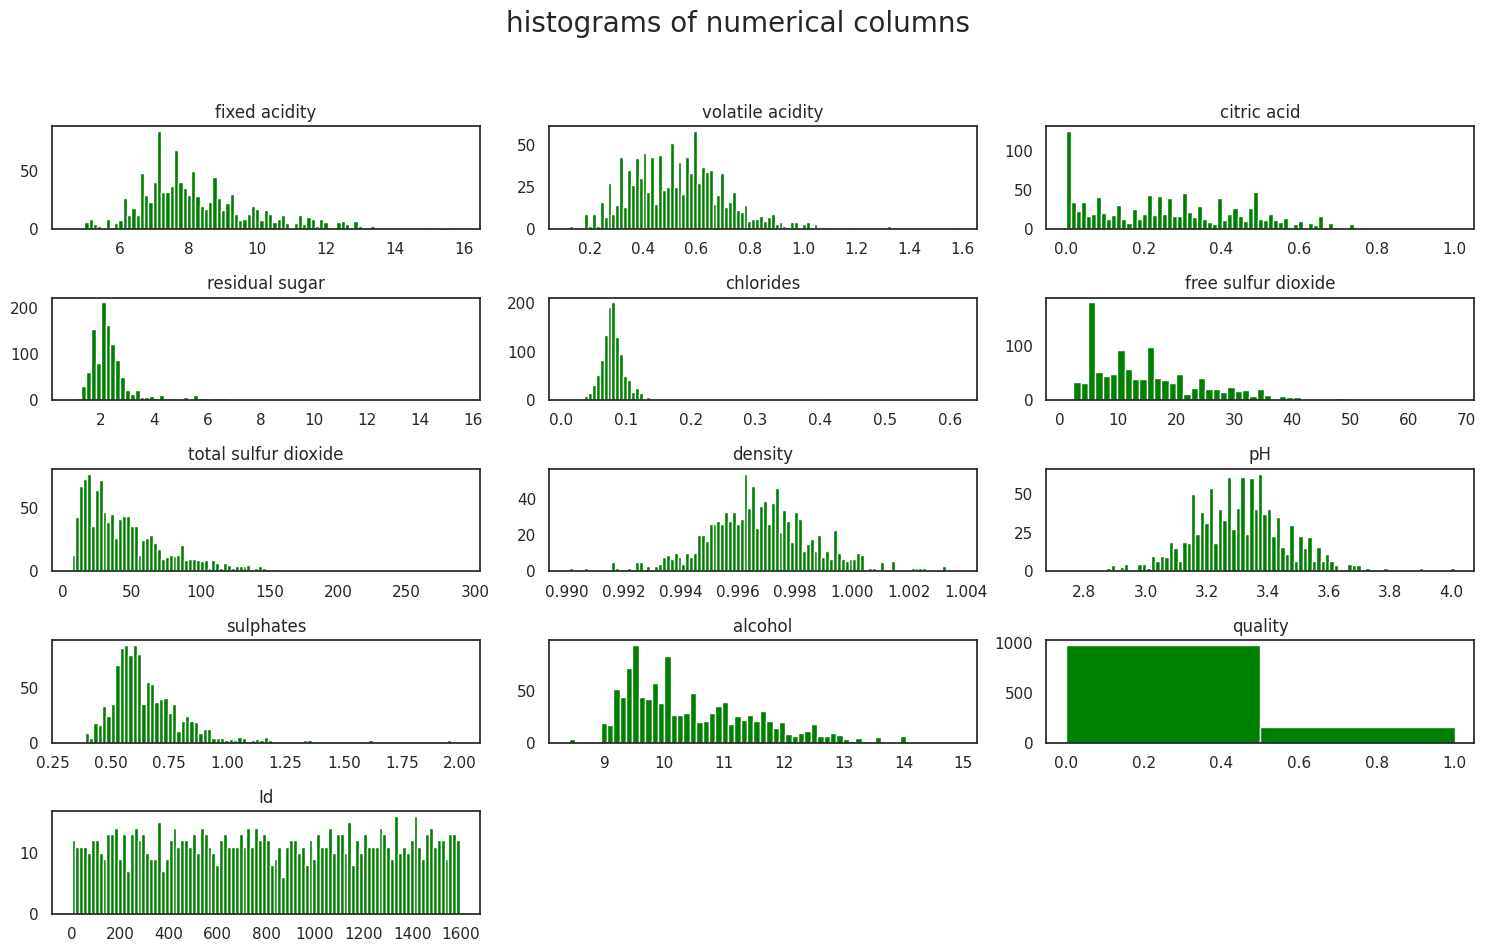

In [101]:
##Histograms
fig=plt.figure(figsize=(15,10))
plt.suptitle("histograms of numerical columns ",fontsize=20)
for i in range(wine.shape[1]):
  plt.subplot(5,3,i+1)
  vals=np.size(wine.iloc[:,i].unique())
  if(vals>=100):
    vals=100
  f=plt.gca()
  f.set_title(wine.columns.values[i])
  plt.hist(wine.iloc[:,i],bins=vals,color="green")
plt.tight_layout(rect=[0,0.03,1,0.95])

In [40]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

<Axes: title={'center': 'Correlation with quality'}>

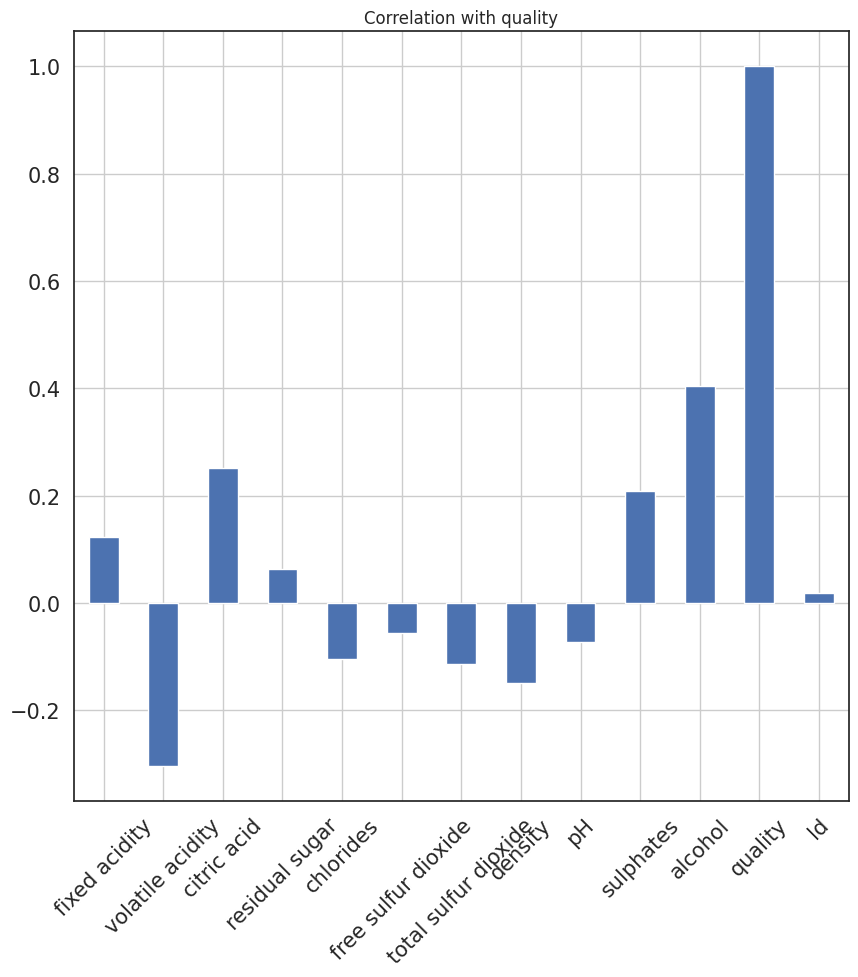

In [41]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
        figsize = (10, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [42]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = wine.corr()

In [43]:
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.123212,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.304523,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.251146,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.064145,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.103985,-0.088099


In [ ]:
# Feature Enggineering

In [44]:
# independent variable
X=wine.drop('quality',axis=1)
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  
0      9.4   0  
1      9.8   1  
2      9.8   2  
3      9.8   3  
4

In [46]:
# dependent variable
y=wine['quality']
print(y.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64


In [47]:
from sklearn.metrics import  accuracy_score,recall_score,f1_score,precision_score

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [94]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
## training
Classifier.fit(X_train,y_train)
## testing
y_pred=Classifier.predict(X_test)
## metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results=pd.DataFrame([['Random Forest (n=100)',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])

In [50]:
## feature_importances
features_label = wine.columns[:12]
importances=Classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]-1):
  print("%2d. %-*s %f "%(i+1,30,features_label[i],importances[indices[i]]))


 1. fixed acidity                  0.148335 
 2. volatile acidity               0.122064 
 3. citric acid                    0.116248 
 4. residual sugar                 0.094428 
 5. chlorides                      0.084685 
 6. free sulfur dioxide            0.076432 
 7. total sulfur dioxide           0.070790 
 8. density                        0.063579 
 9. pH                             0.062791 
10. sulphates                      0.054929 
11. alcohol                        0.053076 


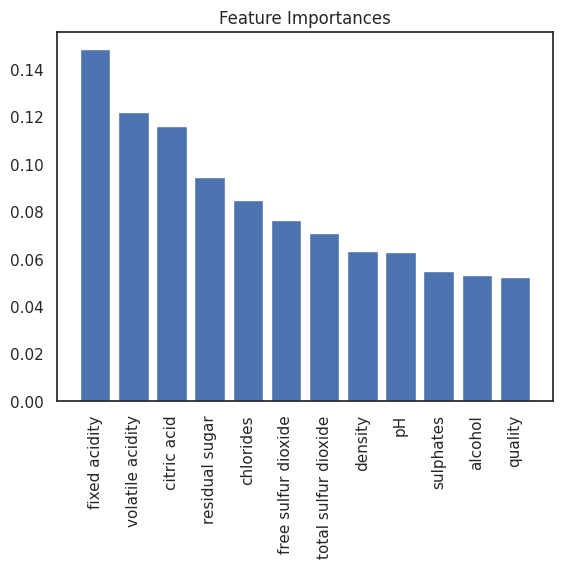

In [51]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],align="center")
plt.xticks(range(X.shape[1]),features_label,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(random_state=0)
## training
Classifier.fit(X_train,y_train)
## testing
y_pred=Classifier.predict(X_test)
## metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results, ignore_index = True)

In [96]:
## SVM (linear)
from sklearn.svm import SVC
Classifier=SVC(random_state=0,kernel='linear')
## training
Classifier.fit(X_train,y_train)
## testing
y_pred=Classifier.predict(X_test)
## metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results=pd.DataFrame([['SVC (linear)',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results, ignore_index = True)

<ipython-input-96-72413f17ff2e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(model_results, ignore_index = True)


In [97]:
## SVM (rbf)
from sklearn.svm import SVC
Classifier=SVC(random_state=0,kernel='rbf')
## training
Classifier.fit(X_train,y_train)
## testing
y_test=list(y_test)
y_pred=Classifier.predict(X_test)
## metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results=pd.DataFrame([['SVC (rbf)',acc,prec,rec,f1]],columns=['Model','Accuracy','Precision','Recall','F1 Score'])
results=results.append(model_results, ignore_index = True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-97-528fc4901bf1>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(model_results, ignore_index = True)


In [98]:
#comparision between models
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.925764,0.705882,0.500000,0.585366
1,Logistic Regression,0.903930,0.571429,0.333333,0.421053
2,SVC (linear),0.903930,0.750000,0.125000,0.214286
3,SVC (rbf),0.895197,0.000000,0.000000,0.000000
